# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2
- umap-learn 0.5.3

In [1]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data[:400]
y = digits.target[:400]

### Vamos a trabajar con una muestra de digits ya que t-SNE puede tardarse mucho si N es muy grande

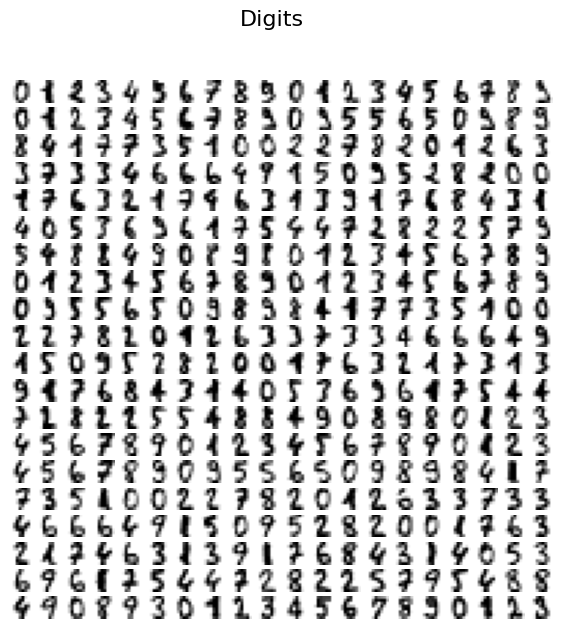

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=20, ncols=20, figsize=(7, 7))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("Digits", fontsize=16)

### Esta es una rutina para dibujar la proyección. Usa un MinMaxScaler sobre la proyección. El primer for recorre el dataset por digito y los dibuja. Hay un parámetro alpha que permite superponerlos. El color se muestrea de una paleta parametrizada por el dígito. El segundo for genera un imagebox con ejemplares de la clase. Evita superponerlos con un umbral de distancia. 

In [11]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title):
    _, ax = plt.subplots(figsize=(8, 8))
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit),
            alpha=0.425, # The alpha blending value, between 0 (transparent) and 1 (opaque)
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 5e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i] 
        ) # Container referring to a specific position xy defined by X[i]
        imagebox.set()
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")


### La proyección está parametrizada por perplexity. n_components indica que la proyección es 2D. Como t-SNE es lento, use paralelismo con n_jobs. La condición de parada es 150 iteraciones sin progreso. El total de iteraciones es 500.

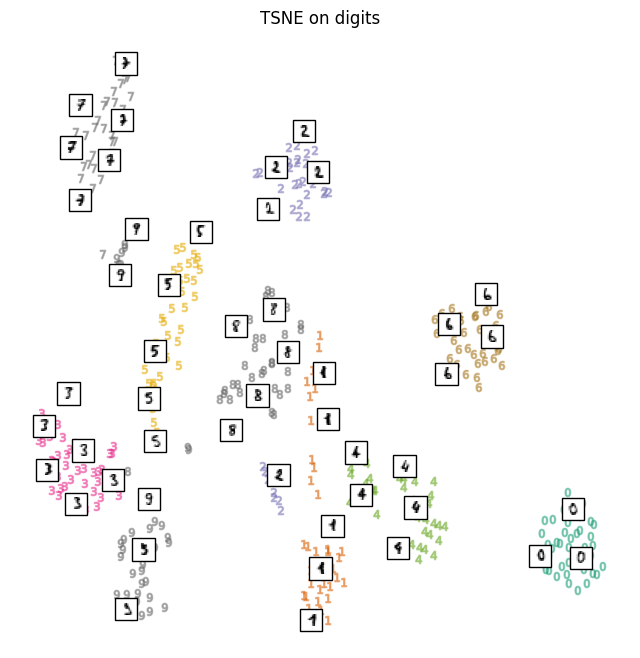

In [4]:
from sklearn.manifold import TSNE

tsne_embed = TSNE(n_components=2, perplexity = 40, n_iter=500, n_iter_without_progress=150, n_jobs=10)
projection = tsne_embed.fit_transform(X, y)
plot_embedding(projection, 'TSNE on digits')
plt.show()

### UMAP tiene dos parámetros. n_neighbors maneja la parsimonia del modelo. Un valor bajo fuerza a UMAP a enfocar estructuras locales. Min_dist define la mínima distancia permitida para pares de puntos en la proyección. 

Ver documentación sobre UMAP en: https://umap-learn.readthedocs.io/en/latest/index.html

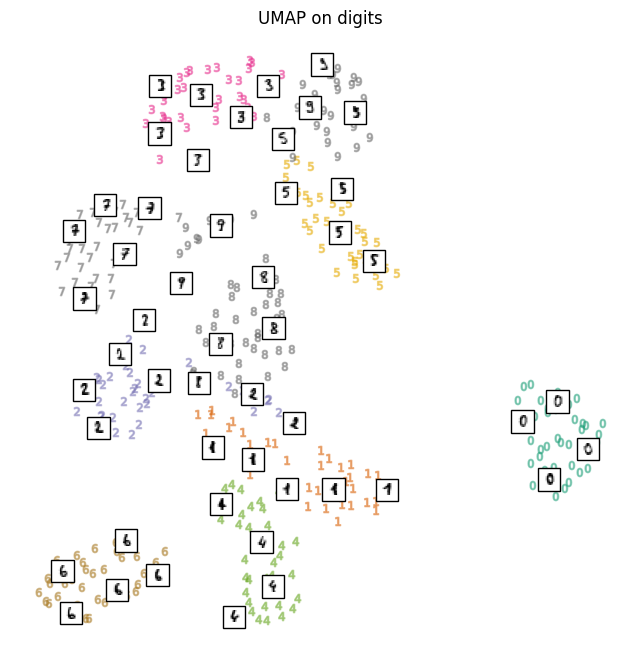

In [9]:
import umap.umap_ as umap

umap_2d = umap.UMAP(n_components = 2, min_dist = 0.6, n_neighbors= 40, n_jobs=8)
projection = umap_2d.fit_transform(X)
plot_embedding(projection, 'UMAP on digits')
plt.show()